In [1]:
# import the Seaborn package for good data visualization.

%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [10]:
!sudo apt-get install -y fonts-nanum*
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package fonts-nanum*
E: Couldn't find any package by glob 'fonts-nanum*'
E: Couldn't find any package by regex 'fonts-nanum*'
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 6 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/dejavu: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [11]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] =False

import pandas as pd

In [12]:
# append the song data from nigerian-songs.csv.
# Load up a dataframe with some data about the songs. 

df = pd.read_csv("./한국환경공단_도로 재비산먼지 측정 정보_20240331.csv")
df.head()

,측정일자,측정시간,지역,지역명,도로명,시작점,종점,기온,습도,재비산먼지 평균농도,오염범례
0,2024-03-04,10:47,서울,성동구,고산자로,서울특별시 성동구 마장동 610-10천,서울특별시 성동구 성수동1가 701-1천,6,33,25,매우좋음
1,2024-03-04,11:42,서울,구로구,구로중앙로,서울특별시 양천구 신정동 330-8제,서울특별시 구로구 구로동 147-5 도,8,26,56,좋음
2,2024-03-04,12:02,서울,구로구,경인로,서울특별시 구로구 신도림동 330-7도,서울특별시 구로구 온수동 44-23 도,9,25,34,매우좋음
3,2024-03-04,12:35,서울,구로구,서해안로,서울특별시 구로구 개봉동 237-12 철,서울특별시 구로구 항동 산50-10 도,9,24,52,좋음
4,2024-03-04,12:54,경기,부천시,양지로,경기도 부천시 옥길동 739-4 도,경기도 부천시 괴안동 50 도,9,25,106,보통


In [13]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   측정일자        588 non-null    object
 1   측정시간        588 non-null    object
 2   지역          588 non-null    object
 3   지역명         588 non-null    object
 4   도로명         588 non-null    object
 5   시작점         588 non-null    object
 6   종점          588 non-null    object
 7   기온          588 non-null    int64 
 8   습도          588 non-null    int64 
 9   재비산먼지 평균농도  588 non-null    int64 
 10  오염범례        588 non-null    object
dtypes: int64(3), object(8)
memory usage: 50.7+ KB


In [14]:
df.isnull().sum()


측정일자          0
측정시간          0
지역            0
지역명           0
도로명           0
시작점           0
종점            0
기온            0
습도            0
재비산먼지 평균농도    0
오염범례          0
dtype: int64

Look at the general values of the data. Note that popularity can be '0' - and there are many rows with that value



In [15]:
df.describe()


,기온,습도,재비산먼지 평균농도
count,588.000000,588.00000,588.000000
mean,9.103741,55.22619,59.636054
std,2.521685,19.60604,83.207425
min,3.000000,16.00000,1.000000
25%,7.000000,39.00000,15.000000
50%,9.000000,54.00000,34.000000
75%,11.000000,70.00000,69.000000
max,17.000000,100.00000,1063.000000


Text(0.5, 1.0, 'Top genres')

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  func(*args, **kwargs)
findfont: Font family 'NanumBarunGothic' not found.
/home/codespace/.local/lib/python3.10/site-packages/IPython/core

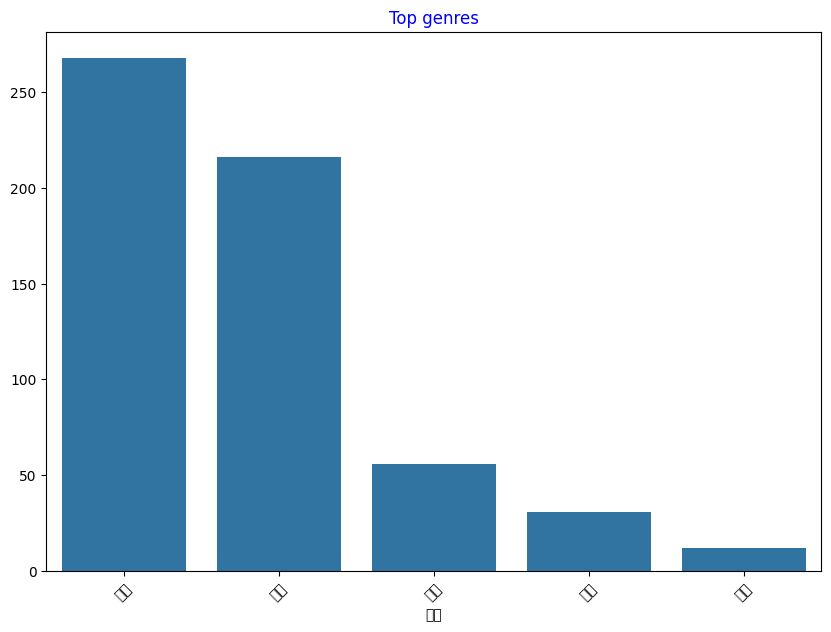

In [8]:
# use a barplot to find out the most popular genres

import seaborn as sns

top = df['지역'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top[:5].index,y=top[:5].values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')